In [1]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

In [2]:
# Load the data set
from sklearn.datasets import load_boston

In [3]:
boston_data = load_boston()

In [4]:
boston_data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
# create Pandas DataFrame with data from Boson dataset
df = pd.DataFrame(data = boston_data['data'])
df.columns = boston_data['feature_names']
df['Price'] = boston_data['target'] # add target data to this DataFrame
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
corr = df.corr()
corr['Price'].sort_values(ascending=False)

Price      1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: Price, dtype: float64

After RM (average number of rooms), LSTAT (lower status of the population) is well (negatively) correlated with Price than the other features. So it's like if the low status people are living more at a particular house, then its price is low. We'll just look at the absolute values of the correlation

In [8]:
corr_values = corr['Price'].abs().sort_values(ascending = False)
corr_values

Price      1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: Price, dtype: float64

<b> We will do multivariate linear regression analysis with these two features </b>

In [9]:
from sklearn import preprocessing 

In [10]:
x_RM = preprocessing.scale(df['RM'])
x_LSTAT = preprocessing.scale(df['LSTAT'])
y = preprocessing.scale(df['Price'])

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,8

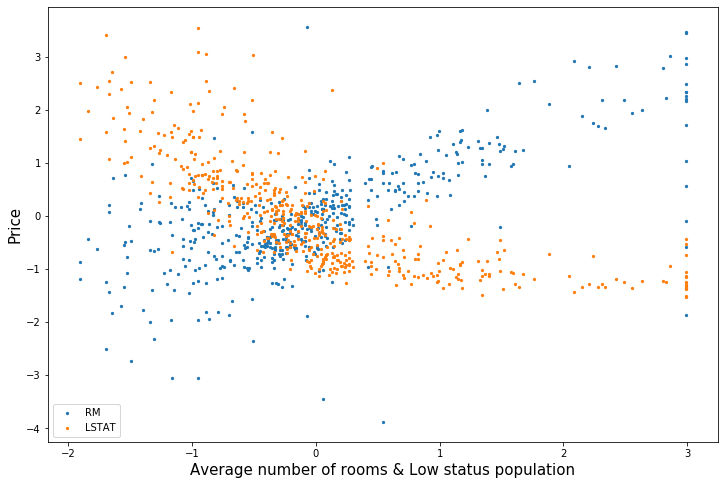

In [12]:
# Plotting both the features in same plot
plt.scatter(y, x_RM, s=5, label = 'RM')
plt.scatter(y, x_LSTAT, s=5, label = 'LSTAT')
plt.legend(fontsize=15)
plt.xlabel('Average number of rooms & Low status population', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.legend()
plt.show()

In [13]:
x = np.c_[np.ones(x_RM.shape[0]),x_RM,x_LSTAT]

In [14]:
alpha = 0.0001
m = y.size
np.random.seed(10)
theta = np.random.rand(3)

In [15]:
def gradient_descent(x, y, m, theta, alpha):
    cost_list = []
    theta_list = []
    prediction_list = []
    cost_list.append(1e10)
    run = True
    i = 0
    while run :
        prediction = np.dot(x,theta)
        prediction_list.append(prediction)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T,error)
        cost_list.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T,error))
        theta_list.append(theta)
        if(cost_list[i] - cost_list[i+1] < 1e-9):
            run = False
        i += 1
    cost_list.pop(0)
    return prediction_list,cost_list,theta_list  

In [16]:
prediction_list, cost_list, theta_list = gradient_descent(x, y, m, theta, alpha)
theta = theta_list[-1]

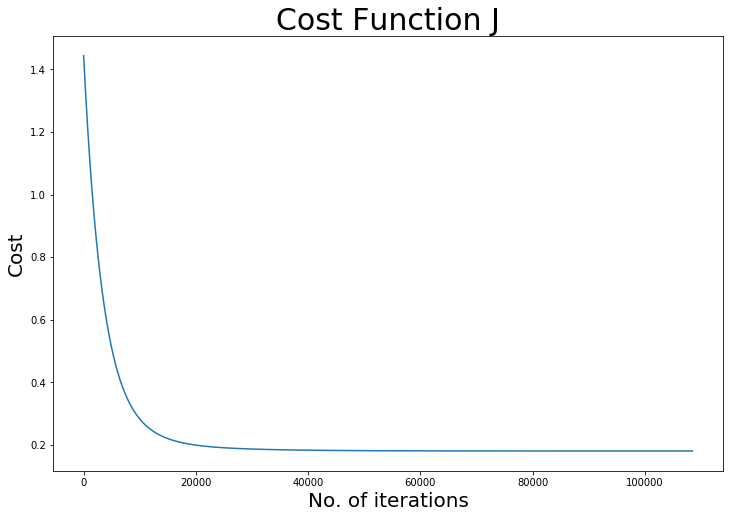

In [17]:
plt.title('Cost Function J', size = 30)
plt.xlabel('No. of iterations', size=20)
plt.ylabel('Cost', size=20)
plt.plot(cost_list)
plt.show()

In [18]:
# using equation of hyper plane
yp = theta[0] + theta[1]*x[:,1] + theta[2]*x[:,2]

## Mean Square of residuals

In [19]:
MSE_equ = ((yp-y)**2).mean() #Using yp from equation of hyperplane
MSE_GD = ((prediction_list[-1]-y)**2).mean()  #From Gradient Descent


print('Mean Square Error using equation of hyperplane : {}'.format(round(MSE_equ,3)))
print('Mean Square Error from Gradient Descent prediction : {}'.format(round(MSE_GD,3)))

Mean Square Error using equation of hyperplane : 0.361
Mean Square Error from Gradient Descent prediction : 0.361


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
ys = df['Price']
xs = np.c_[df['RM'],df['LSTAT']]

In [23]:
print(ys.shape)
print(xs.shape)

(506,)
(506, 2)


In [24]:
xs = preprocessing.scale(xs)
ys = preprocessing.scale(ys)

In [25]:
lm = LinearRegression()

#Fitting the model
lm = lm.fit(xs,ys)

In [26]:
pred = lm.predict(xs)

In [27]:
pred.shape

(506,)

In [31]:
intercept = lm.intercept_
Theta_0 = lm.coef_[0]
Theta_1 = lm.coef_[1]

print('Intercept : {}'.format(round(intercept,3)))
print('Theta_0 : {}'.format(round(Theta_0,4)))
print('Theta_1 : {}'.format(round(Theta_1,4)))

Intercept : 0.0
Theta_0 : 0.3892
Theta_1 : -0.4988


In [32]:
print('Intercept : {}'.format(round(theta[0],3)))
print('Theta_0 : {}'.format(round(theta[1],4)))
print('Theta_1 : {}'.format(round(theta[2],4)))

Intercept : 0.0
Theta_0 : 0.395
Theta_1 : -0.493


In [33]:
r2_sk = lm.score(xs,ys)
print('R square from sci-kit learn: {}'.format(round(r2_sk,4)))

R square from sci-kit learn: 0.6386


In [36]:
r2 = 1 - (sum((prediction_list[-1] - y)**2) / (sum((y - y.mean())**2)))
print('R square doing from the scratch {}'.format(round(r2,4)))          
          

R square doing from the scratch 0.6385


In [41]:
# Create a figure and a 3D Axes
fig = plt.figure(figsize=(12,10))
ax = Axes3D(fig)
ax.set_xlabel('Rooms', fontsize = 15)
ax.set_ylabel('Population', fontsize = 15)
ax.set_zlabel('Price', fontsize = 15)

plt.close()

In [42]:
# Function for getting the 2D view

def plot_view(elev_given, azim_given):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    #Scatter plot
    ax.scatter(xs[:,0], xs[:,1], ys, c='C6', marker='o', alpha=0.6, label='Data points')

    #Plane 

    x0, x1 = np.meshgrid(xs[:,0], xs[:,1])
    yp = Theta_0 * x0 + Theta_1 * x1
    ax.plot_wireframe(x0,x1,yp, rcount=200,ccount=200, linewidth = 0.5, color='C9', alpha=0.5, label='Hyperplane')

    ax.set_xlabel('Rooms', fontsize = 15)
    ax.set_ylabel('Population', fontsize = 15)
    ax.set_zlabel('Price', fontsize = 15)
    plt.legend(fontsize=15)
    ax.view_init(elev=elev_given, azim=azim_given)
 

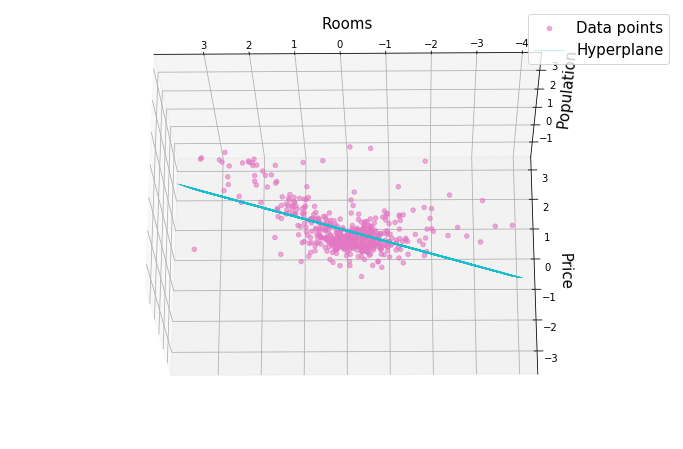

In [43]:
plot_view(-23,91)
plt.show()

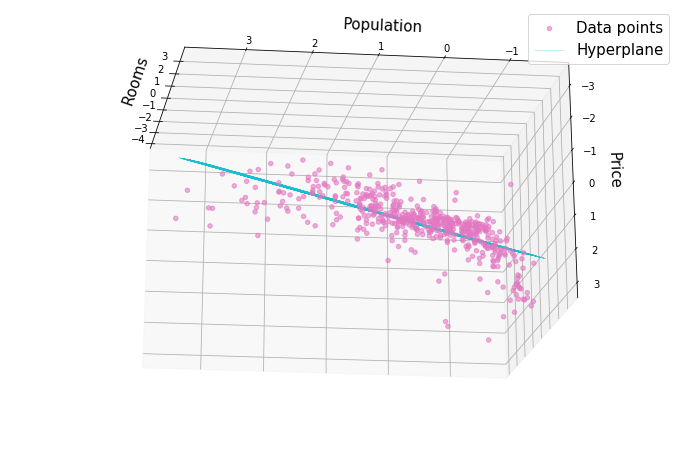

In [44]:
plot_view(158,-172)
plt.show()

### Between different features

In [45]:
x_ZN = df['ZN']

In [46]:
xs = np.c_[df['RM'],df['ZN']]
xs = preprocessing.scale(xs)

In [47]:
lm = lm.fit(xs,ys)

In [48]:
lm.score(xs,ys)

0.5063381295424692

Here we got higher  R2 using RM and LSTAS than using RM and ZN. 
Higher R2 tells you how reliable the fit of your hyperplane to the dataset.

## Simple vs Multivariate

In [49]:
xsingle = preprocessing.scale(df['RM'])

In [52]:
xsingle = xsingle.reshape(-1,1)
lm = lm.fit(xsingle,ys)

In [53]:
print('R square from sci-kit learn using single feature: {}'.format(round(lm.score(xsingle,ys),4)))

R square from sci-kit learn using single feature: 0.4835


Whereas for multiple features we got 0.638 .
One thing we need to keep in mind here is, everytime we add a feature to the model,  R2 will increase.
So, model with more terms may appear to have a better fit simply because it has more terms or more predictors

## Adjusted R-square

In [54]:
# Adjusted R square : 
1 - (1-r2_sk)*(df.shape[0]-1)/(df.shape[0]-2-1)

0.6371244754701231

Adjusted R squared is still higher than R square from single feature.
We can see the multiple linear regression model performs better than simple linear regression model. 
So, overall this linear regression model performs better when used two features RM and ZN instead of using just RM.
With the same above approach, we can include other features and try to fit our hyperplane for multiple features.